Case study on Unsupervised Learning

Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.

In [18]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to the python environment

In [19]:
#Loading the dataset
wine_data=pd.read_csv('Wine (1).csv')

In [20]:
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
wine_data.shape

(178, 13)

In [22]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [23]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [24]:
#Checking the missing values
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

<AxesSubplot:>

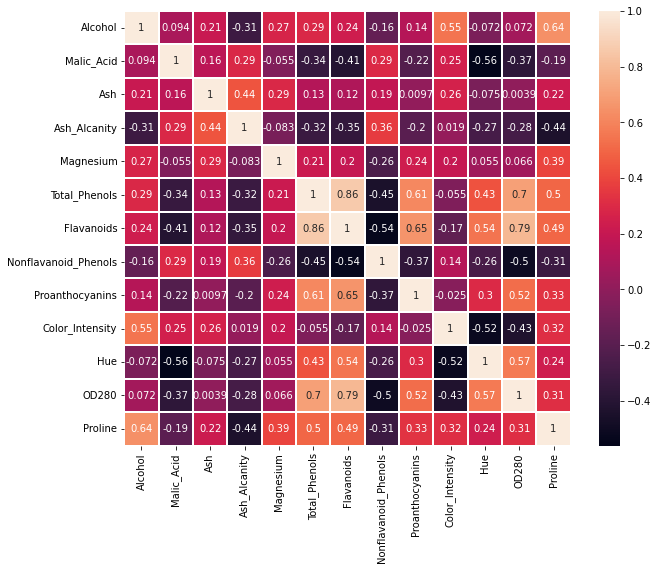

In [25]:
#Correlation matrix
corr=wine_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,linewidth=0.2)

In [26]:
#Standard scaling 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x= ss.fit_transform(wine_data)

# Try out different clustering models in the wine dataset.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


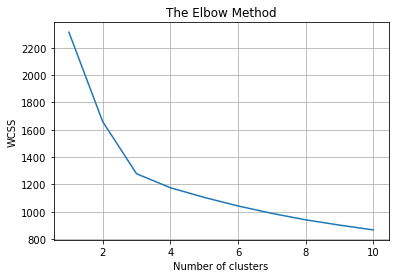

In [27]:
#K Means Model 
#finding optimum number of clusters using Elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

From the above figure, the optimum number of clusters K=3(fixing it by the elbow mwthod).

In [28]:
#K Means
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)
type(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

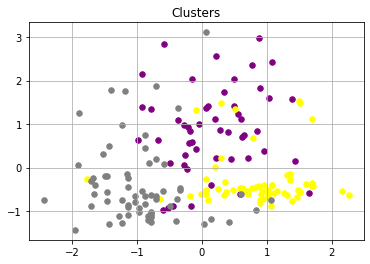

In [29]:
#Scatter plot
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=30,c='purple',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=30,c='yellow',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=30,c='grey',label='Cluster 3')
plt.title('Clusters')
plt.grid()
plt.show()

In [30]:
# Performing PCA on the data to see whether it improves the performance.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(x)
x_pca = pca.transform(x)
x_pca.shape

(178, 2)

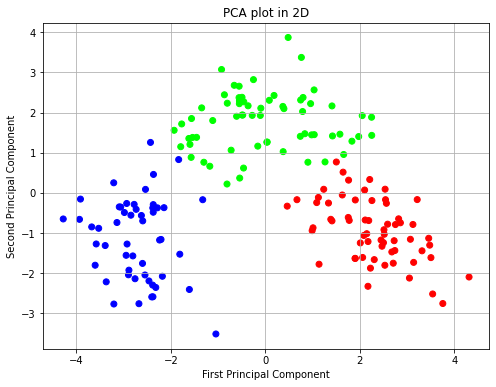

In [31]:
#PCA plot coloured by cluster
plt.figure(figsize=(8,6))
# Scatterplot
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans, cmap="brg")
plt.title('PCA plot in 2D')
plt.grid()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Find the optimum number of clusters in each model and create the model with the optimum number of clusters

In [32]:
#Agglomerative Hierarchical Clustering

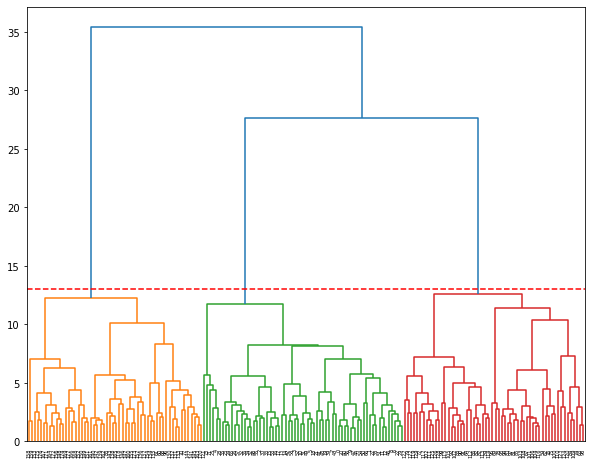

In [33]:
#Finding the optimum number of clusters using dendrogram
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(x, method = "ward")
plt.figure(figsize=(10,8))
dendrogram(linked,orientation="top",distance_sort="ascending", show_leaf_counts=True)
plt.hlines(13,0,5000,colors="r",linestyles="dashed")
plt.show()

The dendrogram shows the optimum number of clusters as 3.

In [34]:
#Creating the agglomerative hierarchical model
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

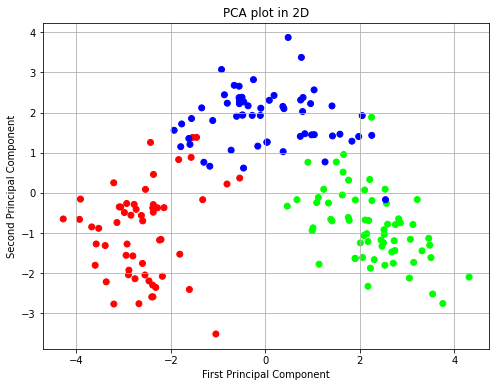

In [35]:
#PCA plot coloured by cluster
plt.figure(figsize=(8,6))
# Scatterplot
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_hc, cmap="brg")
plt.title('PCA plot in 2D')
plt.grid()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


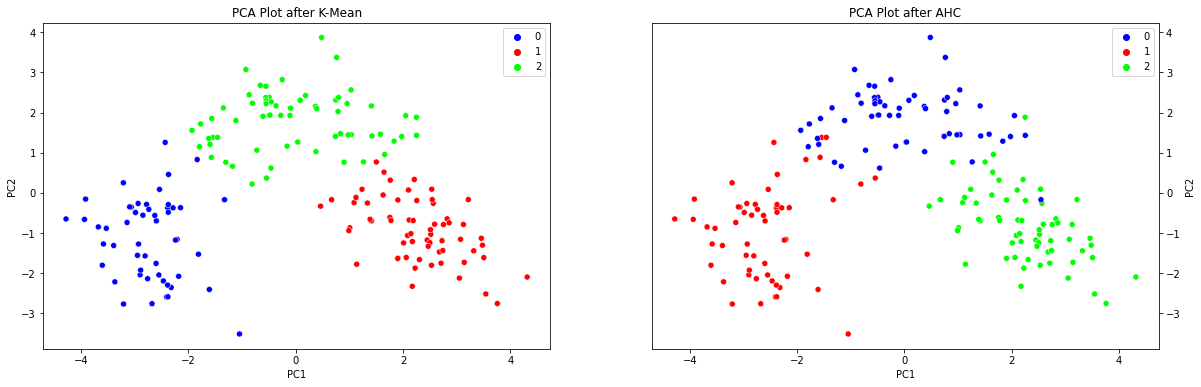

In [36]:
#Comparing plots by K-means vs Agglomerative clustering 
fig,axes = plt.subplots(1,2,figsize = (20,6))
sns.scatterplot(x_pca[:, 0],x_pca[:, 1],hue =y_kmeans,palette='brg', ax=axes[0])
sns.scatterplot(x_pca[:, 0],x_pca[:, 1],hue =y_hc,palette='brg', ax=axes[1])

axes[0].set(xlabel='PC1',ylabel='PC2',title = 'PCA Plot after K-Mean')
axes[1].set(xlabel='PC1',ylabel='PC2',title = 'PCA Plot after AHC')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

Conclusion:

Both the clustering method has given the optimum cluster value as 3. After comparing both our models we can say that the K-means clustering is giving a slightly higher performance score than the Agglomerative Hierarchical Clustering model (After PCA) at identifying Clusters.